In [1]:
library(ggplot2)
library(dplyr, warn.conflicts = FALSE)

penguins <- 
  readr::read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv",
                  col_types = "ccddddcd")

## 統計的仮説検定

統計的仮説検定は、データを用いて特定の仮説が真であるかを評価するための手法です。身長の平均値が異なるかどうかを検定することの主な目的は、サンプルデータに基づいて集団全体の平均値についての推論を行うことが可能です。

具体例として、2つの異なる集団（例：男性と女性）の身長の平均値を比較したい場合を考えてみましょう。この場合、以下のような意味があります。

1. 集団の特徴の理解: 身長の平均値が異なるかどうかを検定することにより、男性と女性の間における身長の違いについての情報を得ることができます。これは、2つの集団の特徴や性差についての知識を深めるために役立ちます。

2. 偶然性の判断: 検定によって、サンプルデータに基づいて集団全体の平均値の差が偶然的なものか、または統計的に有意なものかを判断することができます。有意な差がある場合、その差は確率的な偶然ではなく、データの性質として存在する差である可能性が高いと考えられます。

3. 仮説の検証: 検定は、仮説の検証に使用される統計的手法の一つです。例えば、「男性と女性の身長は異なる」という仮説を立てた場合、検定を通じてその仮説を支持するか、または棄却するかを判断することができます。

検定によって身長の平均値の差が確認された場合、その結果は客観的な判断の根拠となります。統計的仮説検定には、t検定や分散分析などの手法があります。ここでは、t検定を例にいくつかの統計的仮説検定を扱います。まずは、t検定の基本的な考え方について説明します。

### t検定の考え方

2つのデータ間の比較を行う手法としてt検定があります。t検定では、2つのデータ間の平均値の差が偶然的なものかどうかを判断します。t検定では、以下のような仮説を立てます。例えば、男性と女性の身長の平均値が異なるかどうかを検定する場合、以下のような仮説を立てることができます。

- 帰無仮説（$H_0$）: 男性と女性の身長の平均値は等しい
- 対立仮説（$H_1$）: 男性と女性の身長の平均値は等しくない

帰無仮説が棄却された場合、対立仮説が採択されます。この場合、男性と女性の身長の平均値は等しくないということになります。t検定では、帰無仮説が棄却されるかどうかを判断するために、検定統計量と呼ばれる統計量を用います。検定統計量は、サンプルデータから計算される統計量です。t検定では、検定統計量として以下の式で定義されるt値を用います（対応のある2標本の場合）。

$$
t = \frac{\bar{x} - \bar{y}}{var(\bar{x} - \bar{y})} = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s_x^2}{n_x} + \frac{s_y^2}{n_y}}}
$$

- $\bar{x}$: 標本1の平均
- $\bar{y}$: 標本2の平均
- $s_x^2$: 標本1の分散
- $s_y^2$: 標本2の分散
- $n_x$: 標本1のサンプルサイズ
- $n_y$: 標本2のサンプルサイズ

検定統計量が大きいほど、帰無仮説が棄却される可能性が高くなります。t検定では、帰無仮説が棄却されるかどうかを判断するために、t値が従う確率分布を用います。t値は、自由度が $n_x + n_y - 2$ のt分布に従います。t分布は正規分布に似た形をしていますが、正規分布よりも裾野が広い分布です。t分布の形状は自由度によって決まります。自由度が大きくなるほど、t分布は正規分布に近づきます。

t検定では、t値がt分布のどの位置にあるかを確認します。t値がt分布の上位2.5%にある場合、または下位2.5%にある場合、帰無仮説は棄却されます。このように分布の上位と下位の2.5%の範囲（合わせて5%）を両側確率と呼びます。t検定では、両側確率が5%以下の場合、帰無仮説は棄却されます。両側確率が5%以下の場合、t値は有意水準5%で有意となります。有意水準は、帰無仮説が棄却される確率のことです。有意水準は、慣用的に5%や1%などの値が用いられます。有意水準は、利用者が設定します。

### 1標本の平均の検定

まずは、1標本の平均の検定について説明します。1標本の平均の検定では、標本平均がある値と等しいかどうかを検定します。


In [2]:
# 標本として得られたデータ
x <- c(171.0, 165.9, 178.8, 184.0, 183.5,
       168.0, 164.5, 166.0, 170.3, 168.0)

例えば、ある学校の生徒の身長の平均が全国平均170cmと等しいかどうかを検定する場合、以下のような仮説を立てることができます。

- 帰無仮説（$H_0$）: ある学校の生徒の平均身長は全国平均（170cm）と等しい
- 対立仮説（$H_1$）: ある学校の生徒の平均身長は全国平均（170cm）と等しくない

帰無仮説が棄却された場合、対立仮説が採択されます。この場合、生徒の身長の平均は全国平均とは等しくないということになります。1標本の平均の検定では、検定統計量として以下の式で定義されるt値を用います。

$$
t = \frac{\bar{x} - \mu}{\sqrt{\frac{s^2}{n}}}
$$

- $\bar{x}$: 標本の平均
- $\mu$: 帰無仮説で仮定された平均
- $s^2$: 標本の分散
- $n$: 標本のサンプルサイズ

ここで $\bar{x}$ は標本から得られた平均（標本平均）、 $\mu$ は帰無仮説で仮定された平均、 $s$ は標本標準偏差、 $n$ は標本数です。t値は、標本平均と帰無仮説で仮定された平均の差を標本標準偏差で標準化した値です。t値が大きいほど、標本平均と帰無仮説で仮定された平均の差が大きいことを意味します。t値が大きいほど、帰無仮説が棄却される可能性が高くなります。

検定統計量を求めるために、以下のデータを用います。


In [3]:
# 検定統計量を求めるための統計量
mu <- 170.2 # 帰無仮説で仮定された平均（全国平均身長）
# 標本数
length(x)
# 標本平均（ある学校の生徒の平均身長）
mean(x)
# 標本標準偏差
sd(x)

[1] 10

[1] 172

[1] 7.362367

In [4]:
# 検定統計量
(t_statistic <- (mean(x) - mu) /(sd(x) / sqrt(length(x))))

[1] 0.7731345

検定統計量がt分布の両側5%の区間に含まれるかを確認します。


In [5]:
1-0.25
# t分布の両側5%点
two_tailed_5pt <- 
  qt(c(0.025, 0.975), df = length(x)-1)
# t分布の両側5%点の区間に含まれる --> 帰無仮説を有意水準5%で棄却できない
dplyr::between(t_statistic, two_tailed_5pt[1], two_tailed_5pt[2])

[1] 0.75

[1] TRUE

検定統計量がt分布の両側5%点の区間に含まれる場合、帰無仮説を有意水準5%で棄却できないということになります。つまり、生徒の身長の平均は170cmであるという帰無仮説を棄却できないということになります。

`t.test()`関数を用いて、t検定を行うこともできます。


In [6]:
t.test(x, mu = mu)


	One Sample t-test

data:  x
t = 0.77313, df = 9, p-value = 0.4593
alternative hypothesis: true mean is not equal to 170.2
95 percent confidence interval:
 166.7333 177.2667
sample estimates:
mean of x 
      172 


関数の出力結果は、検定統計量の値のほか、自由度、p値などの情報を含みます。p値は、帰無仮説が正しいと仮定したときに、検定統計量が得られる確率です。p値が小さいほど、帰無仮説が正しいと仮定したときに、検定統計量が得られる確率が小さいことを意味します。p値が有意水準よりも小さい場合、帰無仮説を棄却します。p値が有意水準よりも大きい場合、帰無仮説を棄却できません。

この場合、p値は有意水準5%よりも大きいため、帰無仮説を棄却できません。つまり、生徒の身長の平均は全国平均と等しいという帰無仮説を棄却できません。

### 2標本の平均の検定

2標本を扱うt検定では、まず、標本間で得られたデータの分散が等しいかどうかを検定します。分散が等しい場合は、等分散のt検定を行います。分散が等しくない場合は、Welchのt検定を行います。また、標本が対応のあるデータか対応のないデータかによって、t検定の種類が異なります。

#### 等分散のt検定、対応のあるデータ

対応のあるデータとは、2つの標本間で対応関係があるデータのことです。例えば、あるクラスでの講義開始前のテストの点数と講義後のテストの点数、同じ人の身長を1年後に測定したデータなどが対応のあるデータです。

対応のあるデータを扱うt検定では、まず、2つの標本間で得られたデータの差を求めます。そして、差の平均値が0であるかどうかを検定します。差の平均値が0であるという帰無仮説を棄却できない場合、2つの標本間で得られたデータの差は0であるということになります。つまり、2つの標本間で得られたデータに差がないということになります。

共通の13名から得られた運動を行う前と運動を行った後の血圧のデータを用いて、対応のあるt検定を行う場合を考えます。まず、血圧について、運動前と後のデータを用意します。


In [7]:
# 運動を行う前の血圧
x1 <- c(104, 120, 114, 122, 114, 134, 120, 100, 114, 130, 110, 114, 
108)
# 運動を行った後の血圧
x2 <- c(144, 128, 134, 126, 134, 114, 128, 148, 134, 118, 138, 134, 
140)

運動前と後の血圧の差の平均値が0であるかどうかを検定します。帰無仮説は、運動前と後の血圧の差の平均値が0であるということです。


In [8]:
# 2つの標本間で得られたデータに差があるかを検定する
# 帰無仮説：運動前と後の血圧の差の平均値は0
# 対立仮説：運動前と後の血圧の差の平均値は0ではない
t.test(x1, x2, mu = 0, paired = TRUE, var.equal = TRUE)


	Paired t-test

data:  x1 and x2
t = -3.1246, df = 12, p-value = 0.008779
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
 -28.20129  -5.02948
sample estimates:
mean difference 
      -16.61538 


p値が0.05よりも小さく、帰無仮説を棄却できます。つまり、運動前と後の血圧の差の平均値は0ではないということになります。言い換えると、運動前と後の血圧に差があるということになります。

#### 等分散のt検定、対応のないデータ

続いて、対応のないデータでのt検定を行う場合を考えます。対応のないデータとは、2つの標本間で対応関係がないデータのことです。例えば、あるクラスでのテストの点数と別のクラスでのテストの点数、や男女間での身長のデータなどです。ここでもデータが等分散かどうかで、t検定の種類が異なります。

男女の間で、それぞれ次のような数値のデータが得られた状況を考え、t検定を行います。この場合、帰無仮説は、男女間での身長の差の平均値はない、ということです。


In [9]:
x_male <- c(5.1, 5.8, 5.2, 6.0, 6.3, 4.8, 6.8, 5.9, 5.9, 6.1, 5.6, 
            6.0, 5.3, 5.3, 3.6, 2.9, 6.3, 4.7, 5.7, 5.4, 7.1, 5.2)
x_female <- c(5.0, 4.1, 4.2, 5.1, 3.5, 4.1, 4.8, 4.1, 4.8, 5.1, 5.1, 
              3.9, 4.7, 4.0, 3.9, 4.0, 5.0, 4.2, 5.1, 4.7, 3.9, 3.5)
mean(x_male)
mean(x_female)

[1] 5.5

[1] 4.4

統計検定量は以下のようになります。


In [10]:
(t_statistic <- 
  (mean(x_male) - mean(x_female)) / sqrt( (var(x_male)/length(x_male)) + (var(x_female)/length(x_female)) ))

[1] 4.728721

In [11]:
# 2つの標本間で得られたデータに差があるかを検定する
res <- 
  t.test(x_male, x_female, var.equal = TRUE)
res


	Two Sample t-test

data:  x_male and x_female
t = 4.7287, df = 42, p-value = 2.556e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.6305517 1.5694483
sample estimates:
mean of x mean of y 
      5.5       4.4 


### 3つ以上のデータ間の比較

3つ以上のデータ間の比較を行う場合は、分散分析（Analysis of Variance, ANOVA）を用いることができます。分散分析は、2つのデータ間の比較を行うt検定を拡張した手法です。例えば、身長の平均値が異なるかどうかを検定することで、身長の平均値に差があるかどうかを検定することができます。分散分析には、一元配置分散分析や二元配置分散分析などがあります。ここでは、一元配置分散分析を用いて、身長の平均値に差があるかどうかを検定してみましょう。

分散分析（ANOVA）は、複数のグループや条件間の平均値の差を比較する統計的手法です。R言語を使用して分散分析を行うためには、`aov()`関数を使用します

ペンギンの種類によって、体重の平均に差があるかどうかを検定してみましょう。


In [12]:
model <- aov(body_mass_g ~ species, data = penguins)
summary(model)

             Df    Sum Sq  Mean Sq F value Pr(>F)    
species       2 146864214 73432107   343.6 <2e-16 ***
Residuals   339  72443483   213698                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
2 observations deleted due to missingness

`aov()`関数の実行結果を`summary()`関数に渡して、結果を表示します。結果の中で、 $Pr(>F)$ の値が0.05より小さい場合は、有意差があると判断できます。今回の結果では、 $Pr(>F)$ の値が有意水準0.05より小さいため、ペンギンの種類によって、体重の平均に差があると判断できます。

この結果を可視化してみましょう。


Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


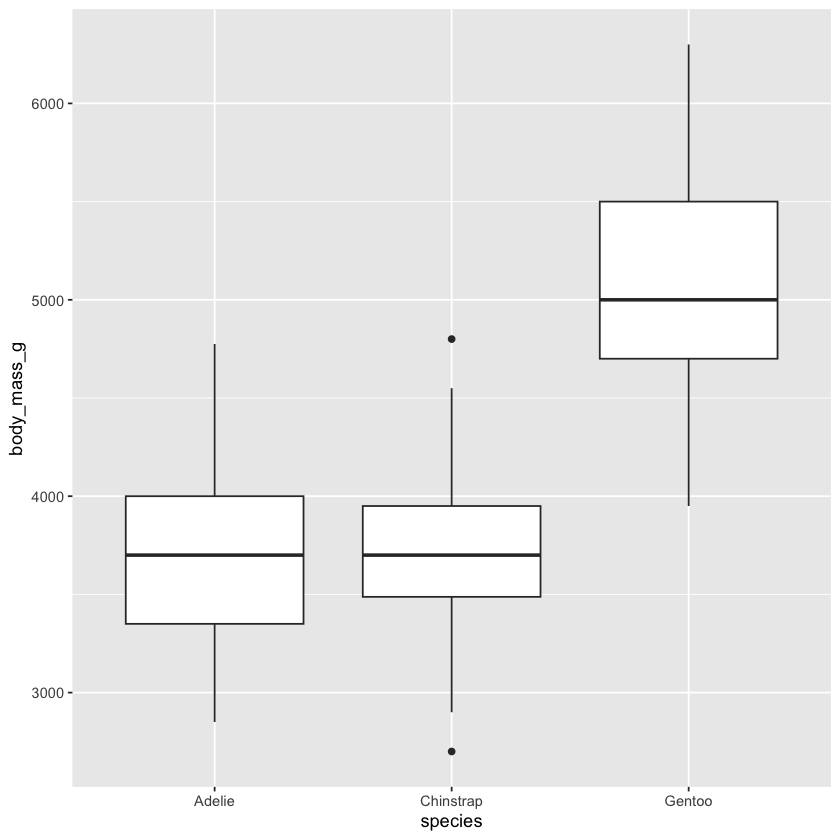

In [13]:
ggplot(data = penguins) +
  aes(species, body_mass_g) +
  geom_boxplot()

## クロス集計

クロス集計は、2つの変数の関係を表現するために用いられる手法です。例えば、ペンギンの種類と生息する島の関係を表現することで、ペンギンの種類によって生息する島の割合が異なることがわかります。Rでは、`table()`関数を使用して、クロス集計を行うことができます。

（分割表）


In [14]:
table(penguins$species, penguins$island)

           
            Biscoe Dream Torgersen
  Adelie        44    56        52
  Chinstrap      0    68         0
  Gentoo       124     0         0

独立性の検定（カイ二乗検定）は、2つの変数が独立であるかどうかを検定する手法です。例えば、ペンギンの種類と生息する島が独立であるかどうかを検定することができます。Rでは、`chisq.test()`関数を使用して、独立性の検定を行うことができます。


In [15]:
chisq.test(table(penguins$species, penguins$island))


	Pearson's Chi-squared test

data:  table(penguins$species, penguins$island)
X-squared = 299.55, df = 4, p-value < 2.2e-16


ここでの独立とは、2つの変数が互いに影響を与えないことを表します。例えば、ペンギンの種類と生息する島が独立である場合、ペンギンの種類が変わっても生息する島は変わらないことを表します。独立性の検定は、2つの変数が独立であるかどうかを検定する手法です。独立性の検定には、カイ二乗検定やフィッシャーの正確確率検定などがあります。ここでは、カイ二乗検定を用いて、ペンギンの種類と生息する島が独立であるかどうかを検定してみましょう。